In [115]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Preparing the Data, Making all the string datatype into the int data type

In [116]:
X.columns

Index(['area', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'stories_1', 'stories_2', 'stories_3', 'stories_4',
       'parking_0', 'parking_1', 'parking_2', 'parking_3', 'furnished',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [117]:
df=pd.read_csv('Housing.csv')

### Removing the outliers

In [118]:
threshold = 2

mean = np.mean(df.price)
std = np.std(df.price)
z_scores = np.abs((df.price - mean) / std)
outliers = z_scores > threshold
print("Removed house prices:")
print(df[outliers].price)
df = df[~outliers]

Removed house prices:
0     13300000
1     12250000
2     12250000
3     12215000
4     11410000
5     10850000
6     10150000
7     10150000
8      9870000
9      9800000
10     9800000
11     9681000
12     9310000
13     9240000
14     9240000
15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
20     8750000
21     8680000
22     8645000
23     8645000
24     8575000
25     8540000
Name: price, dtype: int64


In [119]:
df.mainroad = [ 1 if each == "yes" else 0 for each in df.mainroad]
df.guestroom = [ 1 if each == "yes" else 0 for each in df.guestroom]
df.basement = [ 1 if each == "yes" else 0 for each in df.basement]
df.hotwaterheating = [ 1 if each == "yes" else 0 for each in df.hotwaterheating]
df.airconditioning = [ 1 if each == "yes" else 0 for each in df.airconditioning]

In [120]:
dummies = pd.get_dummies(df["bedrooms"],'bedrooms')
df.drop("bedrooms", axis = 1, inplace = True)
df = pd.concat([df,dummies], axis =1)

In [121]:
dummies = pd.get_dummies(df['bathrooms'], 'bathrooms')
df.drop("bathrooms", axis = 1, inplace = True)
df = pd.concat([df,dummies], axis =1)

In [122]:
dummies = pd.get_dummies(df['stories'], 'stories')
df.drop("stories", axis = 1, inplace = True)
df = pd.concat([df,dummies], axis =1)

In [123]:
dummies = pd.get_dummies(df['parking'], 'parking')
df.drop("parking", axis = 1, inplace = True)
df = pd.concat([df,dummies], axis =1)

In [124]:
dummies = pd.get_dummies(df['furnishingstatus']) 
df.drop("furnishingstatus", axis = 1, inplace = True)
df = pd.concat([df,dummies], axis =1)

In [125]:
df.area = ((df.area- df.area.min()) / (df.area.max()-df.area.min())) #using the formula X= ((X-X.min())/X.max()-X.min())

In [126]:
df.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_1,bedrooms_2,...,stories_2,stories_3,stories_4,parking_0,parking_1,parking_2,parking_3,furnished,semi-furnished,unfurnished
26,8463000,0.311828,1,1,1,0,1,yes,0,0,...,0,0,1,1,0,0,0,0,1,0
27,8400000,0.517921,1,0,0,0,0,no,0,0,...,0,0,0,0,1,0,0,0,1,0
28,8400000,0.451613,1,0,1,1,0,no,0,0,...,1,0,0,0,0,1,0,0,0,1
29,8400000,0.275986,1,0,1,0,1,yes,0,0,...,1,0,0,0,1,0,0,0,1,0
30,8400000,0.417563,1,0,0,0,1,no,0,0,...,0,0,1,0,0,1,0,0,0,1


In [127]:
X=df.drop(["price", "prefarea"], axis=1)
Y=df["price"]

In [128]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2)
X_train

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,stories_2,stories_3,stories_4,parking_0,parking_1,parking_2,parking_3,furnished,semi-furnished,unfurnished
39,0.311828,1,0,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
145,0.240143,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
184,0.096774,1,1,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
375,0.308961,1,1,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
198,0.308100,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0.141935,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
321,0.141935,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
453,0.101720,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0.126882,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


### Visualizing the Data

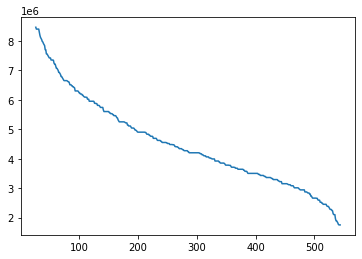

In [129]:
plt.plot(Y)

Text(0, 0.5, 'Price')

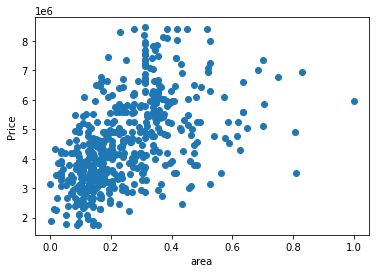

In [130]:
plt.scatter (df["area"], df["price"])
plt.xlabel("area")
plt.ylabel("Price")

### Running the model

In [134]:
@tf.function
def train_model (model, optimizer, m_loss, x, y, accuracy):
    with tf.GradientTape() as tape:
        prediction=model(x)
        loss=m_loss(y, prediction)
    gradients=tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    accuracy.update_state (y, prediction)
    return loss

In [135]:
def train_each_step (model, optimizers, train_ds, main_loss, accuracy, epochs):
    epoch_list=[]
    loss_list=[]
    loss=0
    for epoch in range (epochs):
        for (x, y) in train_ds:
            epoch+=1
            loss=train_model(model,
                            optimizers,
                            main_loss,
                            x,
                            y,
                            accuracy)
            tf.print("epoch: ", epoch + 1, "loss: ", loss, "accuracy: ", accuracy.result())
            loss_list.append(loss)
            epoch_list.append(epoch)
            if (epoch==epochs):
                break
    print(accuracy.result(), loss)
    #return loss_list, epoch_list

In [1]:
train_dataset=tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size=32)

NameError: name 'tf' is not defined

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense (1, )
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
losses = tf.keras.losses.CategoricalCrossentropy()
accuracy = tf.keras.metrics.CategoricalAccuracy()
train_each_step(model, optimizer, train_dataset, losses, accuracy, 70)

In [143]:
import seaborn as sns

In [149]:
X

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,stories_2,stories_3,stories_4,parking_0,parking_1,parking_2,parking_3,furnished,semi-furnished,unfurnished
26,0.311828,1,1,1,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
27,0.517921,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
28,0.451613,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
29,0.275986,1,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
30,0.417563,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.096774,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
541,0.053763,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
542,0.141219,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
543,0.090323,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [150]:
model.predict(X_test)

array([[-2223.7056],
       [-1354.8414],
       [-4276.166 ],
       [-3223.394 ],
       [-3492.989 ],
       [-1689.553 ],
       [-2906.7288],
       [-3410.8823],
       [-2137.457 ],
       [-3437.1006],
       [-2521.296 ],
       [-1749.5703],
       [-2305.5002],
       [-1304.7754],
       [-3708.9333],
       [-2283.0195],
       [-3111.4036],
       [-2358.805 ],
       [-1998.9388],
       [-2296.8086],
       [-1855.1893],
       [-2407.2603],
       [-2270.1086],
       [-1514.2638],
       [-1579.8649],
       [-1701.5533],
       [-1689.9518],
       [-2267.9263],
       [-1550.5704],
       [-2613.0188],
       [-1380.8501],
       [-1476.2041],
       [-2705.997 ],
       [-2804.746 ],
       [-2751.034 ],
       [-3376.8655],
       [-1731.0005],
       [-2772.5098],
       [-2439.3503],
       [-2152.7048],
       [-2868.484 ],
       [-2298.2869],
       [-5347.7534],
       [-1681.9193],
       [-2836.5127],
       [-3146.1594],
       [-2764.5696],
       [-1861